Nama : Az - Zahra Chikal E

NIM : 1103213039

Kelas : TK-45-05

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">Car Features and MSRP EDA</p>

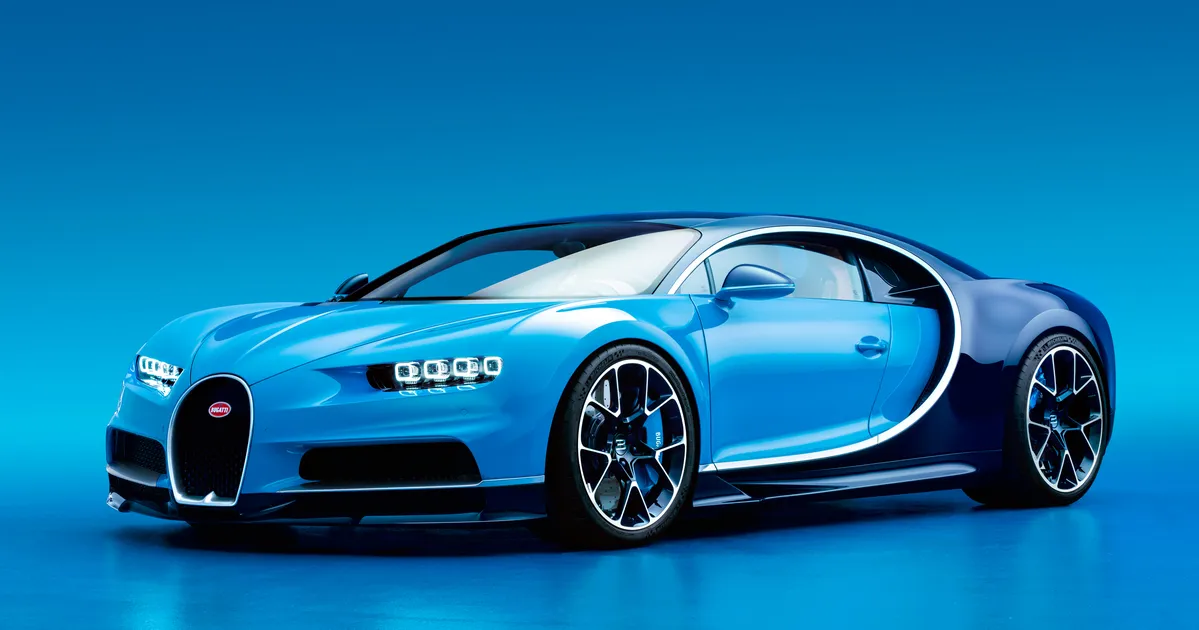

## 1.0 About DataSet

### Context
Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price. Scraped from Edmunds and Twitter.

### Acknowledgements
Edmunds and Twitter for providing info

### Data Description

The dataset includes details such as the car's Make, Model, Year, Engine Specs, Transmission Type, Driven Wheels, Doors, Vehicle Size, Style, Fuel Efficiency (Highway/City MPG), Popularity, and Price (MSRP). It covers both technical specs and market-related data.


| Column              | Description                                       |
|---------------------|---------------------------------------------------|
| Make                | Manufacturer of the car                           |
| Model               | Specific model of the car                         |
| Year                | Year the car was manufactured                     |
| Engine Fuel Type     | Type of fuel used by the engine (e.g., petrol, diesel)    |
| Engine HP           | Horsepower of the engine                          |
| Engine Cylinders    |Number of cylinders in the engine                  |
| Transmission Type   |Gearbox type (manual or automatic)                 |
| Driven_Wheels       | Which wheels drive the car (FWD, RWD, AWD)        |
| Number of Doors     | Number of doors on the vehicle                    |
| Market Category     | Marketing segment for the vehicle                 |
| Vehicle Size        | Size classification of the car                    |
| Vehicle Style       | Body style of the car (e.g., sedan, SUV)          |
| Highway MPG         | Fuel efficiency on highways                       |
| City MPG            | Fuel efficiency in city driving                   |
| Popularity          | Popularity index of the car                       |
| MSRP                | Manufacturer's Suggested Retail Price             |


### Inspiration
- Effects of features on the price
- How does the brand affect the price?
- What cars can be consider overpriced?
- Price VS. popularity?

## 2.0 Importing Libraries

In this section, We will be importing the necessary libraries and explaining their roles in this project.

- **Numpy :** Numerical computing library.
- **Pandas :** Data manipulation and analysis library.
- **Matplotlib :** Data visualization library.
- **Seaborn :** Statistical data visualization library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

## 3.0 Loading Dataset

In [2]:

# Memuat dataset ke dalam DataFrame pandas
df = pd.read_csv('Car_data.csv')

# Menampilkan beberapa baris pertama dari dataset
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# 4.0 Exploring Dataset

In [3]:
# Melihat shape dari DataFrame
print(df.shape)

(11914, 16)


In [4]:
# Melihat statistical summary dari DataFrame
print(df.describe())

               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## 5.0 Organize Columns

In [6]:
# Mengganti nama kolom dalam DataFrame
df = df.rename(columns={
    'Make': 'Brand',
    'Engine Fuel Type': 'Fuel_Type',
    'Engine HP': 'Horsepower',
    'Engine Cylinders': 'Cylinders',
    'Transmission Type': 'Transmission',
    'Driven_Wheels': 'Drive_Type',
    'Number of Doors': 'Doors',
    'Market Category': 'Market_Category',
    'Vehicle Size': 'Vehicle_Size',
    'Vehicle Style': 'Vehicle_Style',
    'highway MPG': 'Highway_MPG',
    'city mpg': 'city_mpg',
    'MSRP': 'Price'
})

# Menampilkan kolom yang sudah di-rename
print(df.columns)

Index(['Brand', 'Model', 'Year', 'Fuel_Type', 'Horsepower', 'Cylinders',
       'Transmission', 'Drive_Type', 'Doors', 'Market_Category',
       'Vehicle_Size', 'Vehicle_Style', 'Highway_MPG', 'city_mpg',
       'Popularity', 'Price'],
      dtype='object')


In [7]:
# Mengklasifikasikan kolom berdasarkan tipe data
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
other_cols = df.select_dtypes(exclude=['int64', 'float64', 'object']).columns.tolist()

# Menampilkan hasil klasifikasi kolom
print("Kolom numerik:", numerical_cols)
print("Kolom kategorikal:", categorical_cols)
print("Kolom lainnya (selain 'int64', 'float64', 'object'):", other_cols)

Kolom numerik: ['Year', 'Horsepower', 'Cylinders', 'Doors', 'Highway_MPG', 'city_mpg', 'Popularity', 'Price']
Kolom kategorikal: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Drive_Type', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style']
Kolom lainnya (selain 'int64', 'float64', 'object'): []



| **Type of Columns**      | **Column Names**                                                                                                 |
|--------------------------|-----------------------------------------------------------------------------------------------------------------|
| **Numerical Columns**     | Year, Horsepower, Cylinders, Doors, Highway_MPG, city_mpg, Popularity, Price                                      |
| **Categorical Columns**   | Brand, Model, Fuel_Type, Transmission, Drive_Type, Market_Category, Car_Size, Car_Style                           |
| **Other Columns**         | None (e.g., DateTime)                                                                                            |

In [8]:
# Fetch columns with datatype 'float'
float_columns = df.select_dtypes(include=['float']).columns
print(float_columns)

Index(['Horsepower', 'Cylinders', 'Doors'], dtype='object')


## 6.0 Data Cleaning

In [9]:
#Check the null values in dataset
df.isnull().sum()

Brand                 0
Model                 0
Year                  0
Fuel_Type             3
Horsepower           69
Cylinders            30
Transmission          0
Drive_Type            0
Doors                 6
Market_Category    3742
Vehicle_Size          0
Vehicle_Style         0
Highway_MPG           0
city_mpg              0
Popularity            0
Price                 0
dtype: int64

In [10]:
# Remove the "Doors" and "Market_Category" columns, as they are not very important
df = df.drop(columns =['Market_Category', 'Doors'])

In [11]:
df.columns

Index(['Brand', 'Model', 'Year', 'Fuel_Type', 'Horsepower', 'Cylinders',
       'Transmission', 'Drive_Type', 'Vehicle_Size', 'Vehicle_Style',
       'Highway_MPG', 'city_mpg', 'Popularity', 'Price'],
      dtype='object')

In [12]:
# Remove rows where "Cylinders" column values are empty
df.dropna(subset = ['Cylinders'], inplace=True)

In [13]:
df[df['Fuel_Type'].isnull()]

,Brand,Model,Year,Fuel_Type,Horsepower,Cylinders,Transmission,Drive_Type,Vehicle_Size,Vehicle_Style,Highway_MPG,city_mpg,Popularity,Price
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,25,17,481,18499


In [14]:
# Fill the 3 empty values of Fuel Type column with most frequent values
df['Fuel_Type'] = df['Fuel_Type'].fillna(df['Fuel_Type'].mode()[0])

In [15]:
df['Horsepower'].mode()[0]

200.0

In [16]:
df['Horsepower'].describe()

count    11816.000000
mean       249.514472
std        109.261297
min         55.000000
25%        170.000000
50%        227.000000
75%        300.000000
max       1001.000000
Name: Horsepower, dtype: float64

In [17]:
# Fill the null values in "Horsepower" columns with median / 50% of data
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].median())

In [18]:
# Lets Check null values now
df.isnull().sum()

Brand            0
Model            0
Year             0
Fuel_Type        0
Horsepower       0
Cylinders        0
Transmission     0
Drive_Type       0
Vehicle_Size     0
Vehicle_Style    0
Highway_MPG      0
city_mpg         0
Popularity       0
Price            0
dtype: int64

In [19]:
df.shape

(11884, 14)

## 7.0 EDA (Exploratory Data Analysis)

## 8.0 Uni-Variate Analysis

### Transmission

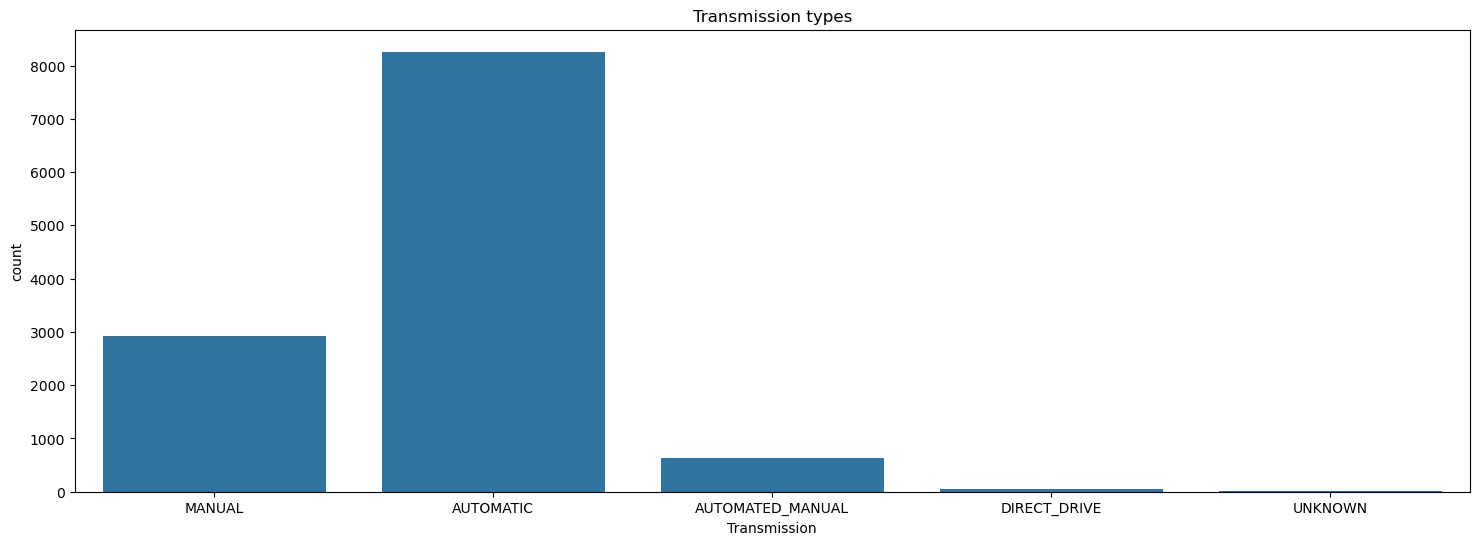

In [20]:
# Count the occurrences of each transmission type in dataset
plt.figure(figsize=(18, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Transmission types')
plt.show()

In [21]:
df[df['Transmission'] == 'UNKNOWN'].shape

(19, 14)

In [22]:
# Remove rows where the Transmission type is unknown
df = df[df['Transmission'] != 'UNKNOWN']

In [23]:
df.shape

(11865, 14)

### Fuel_Type

In [24]:
df['Fuel_Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

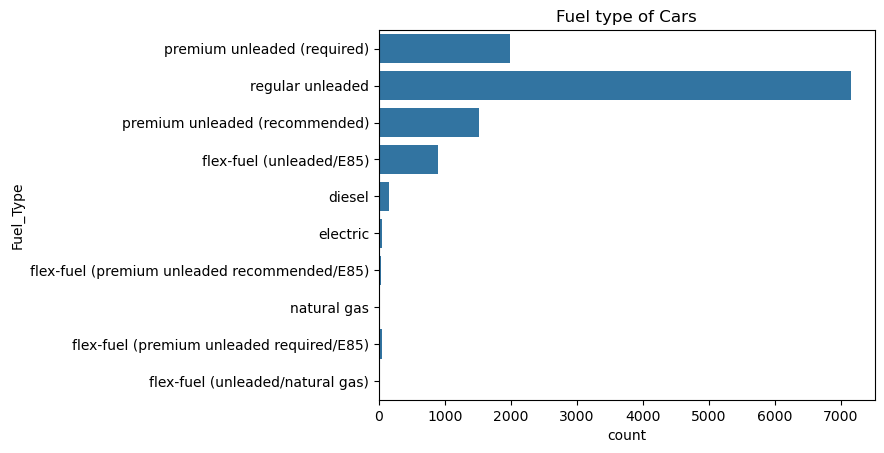

In [25]:
 # Count the occurrences of each fuel type in the dataset
sns.countplot(y='Fuel_Type', data=df)
plt.title('Fuel type of Cars')
plt.show()

**We can See that regular unleaded cars have highest number in dataset**

In [26]:
df['Fuel_Type'].value_counts()

Fuel_Type
regular unleaded                                7153
premium unleaded (required)                     1992
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          56
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: count, dtype: int64

### Year

<Axes: ylabel='Frequency'>

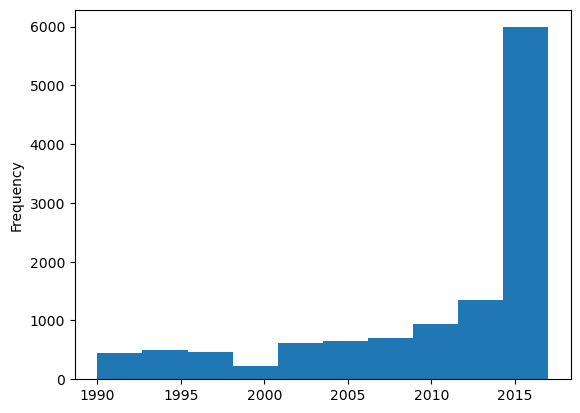

In [27]:
df['Year'].plot(kind='hist')

### Drive_Type

In [28]:
# Count the occurrences of each drive type in descending order
drive_type = df['Drive_Type'].value_counts(ascending=False).reset_index()
drive_type

,Drive_Type,count
0,front wheel drive,4776
1,rear wheel drive,3335
2,all wheel drive,2353
3,four wheel drive,1401


## 9.0 Bivariate Analysis

### Transmission vs Brand

In [29]:
# Calculate the percentage distribution of transmission types across car brands
pd.crosstab(df['Transmission'],df['Brand'],normalize='columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,8.333333,100.0,23.655914,36.890244,5.389222,0.0,100.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.402685,27.329193,0.000000
AUTOMATIC,68.253968,0.0,40.860215,42.682927,76.347305,100.0,0.0,100.0,97.229219,66.458519,...,100.0,54.954955,55.0,0.0,62.890625,62.678063,0.0,82.684564,37.515528,85.053381
DIRECT_DRIVE,0.000000,0.0,0.000000,0.000000,1.197605,0.0,0.0,0.0,0.000000,0.713649,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,100.0,0.268456,0.000000,0.000000
MANUAL,23.412698,0.0,35.483871,20.426829,17.065868,0.0,0.0,0.0,2.770781,32.827832,...,0.0,45.045045,45.0,100.0,37.109375,37.321937,0.0,16.644295,35.155280,14.946619


### Drive_Type vs Brand

In [30]:
# Calculate the percentage distribution of transmission types across car brands
pd.crosstab(df['Drive_Type'],df['Brand'],normalize='columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Drive_Type,,,,,,,,,,,,,,,,,,,,,
all wheel drive,27.380952,0.0,0.0,77.439024,43.113772,64.864865,100.0,23.979592,30.730479,4.549509,...,0.0,30.630631,0.0,0.0,86.328125,15.384615,61.111111,9.798658,8.322981,35.587189
four wheel drive,1.587302,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,9.068010,23.104371,...,0.0,0.000000,0.0,0.0,3.515625,17.378917,0.000000,25.771812,0.248447,0.000000
front wheel drive,69.444444,0.0,0.0,22.560976,0.299401,0.000000,0.0,69.387755,16.876574,34.076717,...,0.0,69.369369,80.0,0.0,5.468750,50.427350,0.000000,42.281879,90.310559,45.907473
rear wheel drive,1.587302,100.0,100.0,0.000000,56.586826,35.135135,0.0,6.632653,43.324937,38.269402,...,100.0,0.000000,20.0,100.0,4.687500,16.809117,38.888889,22.147651,1.118012,18.505338


### Brand vs Maximum Horsepower

In [31]:
# Check the Top 10 Car Brands with the Highest Horsepower
top_hp = df.groupby('Brand')['Horsepower'].max().sort_values(ascending=False).reset_index().head(10)
top_hp

,Brand,Horsepower
0,Bugatti,1001.0
1,Lamborghini,750.0
2,Ferrari,731.0
3,Dodge,707.0
4,Ford,662.0
5,Chevrolet,650.0
6,McLaren,641.0
7,Mercedes-Benz,641.0
8,Cadillac,640.0
9,Maybach,631.0


C:\Users\Azzahra\AppData\Local\Temp\ipykernel_35760\2421388991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x='Brand', y = 'Horsepower', data=top_hp, palette = 'coolwarm')


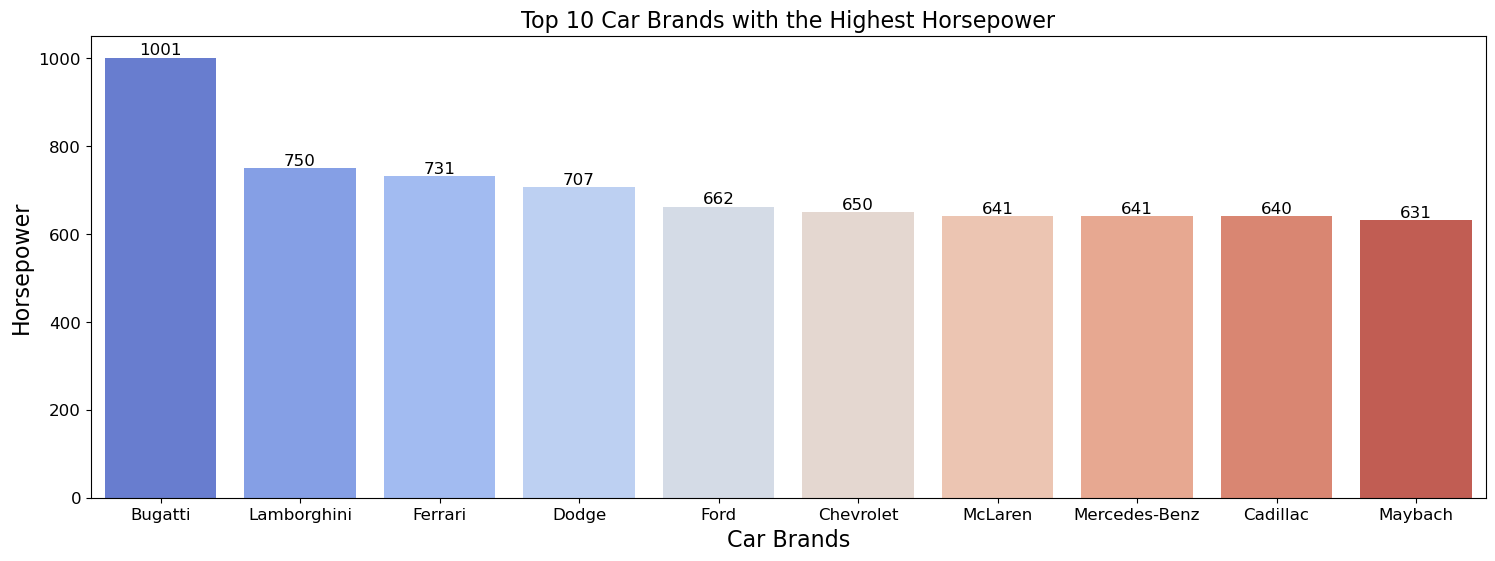

In [32]:
# Plot the Top 10 Car Brands with the Highest Horsepower
plt.figure(figsize=(18, 6))
fig = sns.barplot(x='Brand', y = 'Horsepower', data=top_hp, palette = 'coolwarm')
plt.title('Top 10 Car Brands with the Highest Horsepower', fontsize = 16)
plt.xlabel('Car Brands', fontsize = 16)
plt.ylabel('Horsepower', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

for i in fig.containers:
    fig.bar_label(i, fontsize = 12)


plt.show()

### Fuel_Type vs Cylinder

In [33]:
# Determine which fuel type of vehicles has the highest number of cylinders
fc = df.groupby(['Fuel_Type'])['Cylinders'].count().sort_values(ascending=False).reset_index()
fc

,Fuel_Type,Cylinders
0,regular unleaded,7153
1,premium unleaded (required),1992
2,premium unleaded (recommended),1523
3,flex-fuel (unleaded/E85),899
4,diesel,154
5,electric,56
6,flex-fuel (premium unleaded required/E85),54
7,flex-fuel (premium unleaded recommended/E85),26
8,flex-fuel (unleaded/natural gas),6
9,natural gas,2


<Axes: xlabel='Cylinders', ylabel='Fuel_Type'>

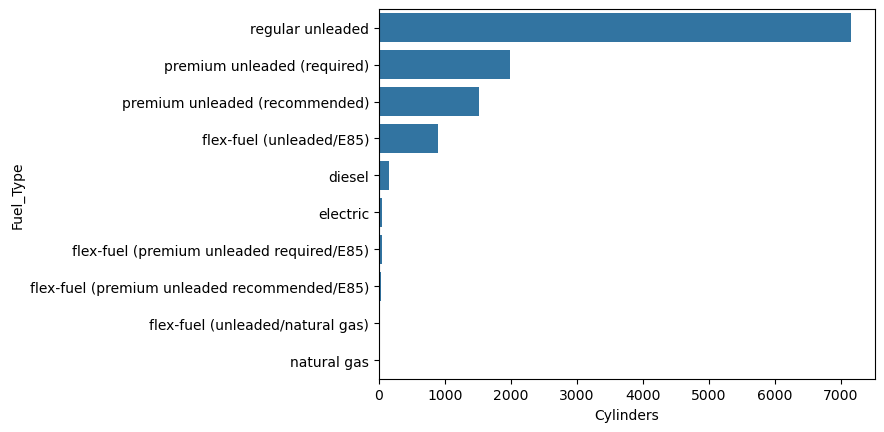

In [34]:
sns.barplot(y = 'Fuel_Type', x='Cylinders', data = fc)

### Brand vs Popularity

In [35]:
# Get the top 10 brands by popularity  according to dataset
top_brands = df.groupby('Brand')['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_brands

,Brand,Popularity
14,Ford,4983817
9,Chevrolet,1552585
45,Toyota,1513095
4,BMW,1307944
11,Dodge,1143918
33,Nissan,1121022
3,Audi,1018440
18,Honda,988698
46,Volkswagen,702765
8,Cadillac,644728


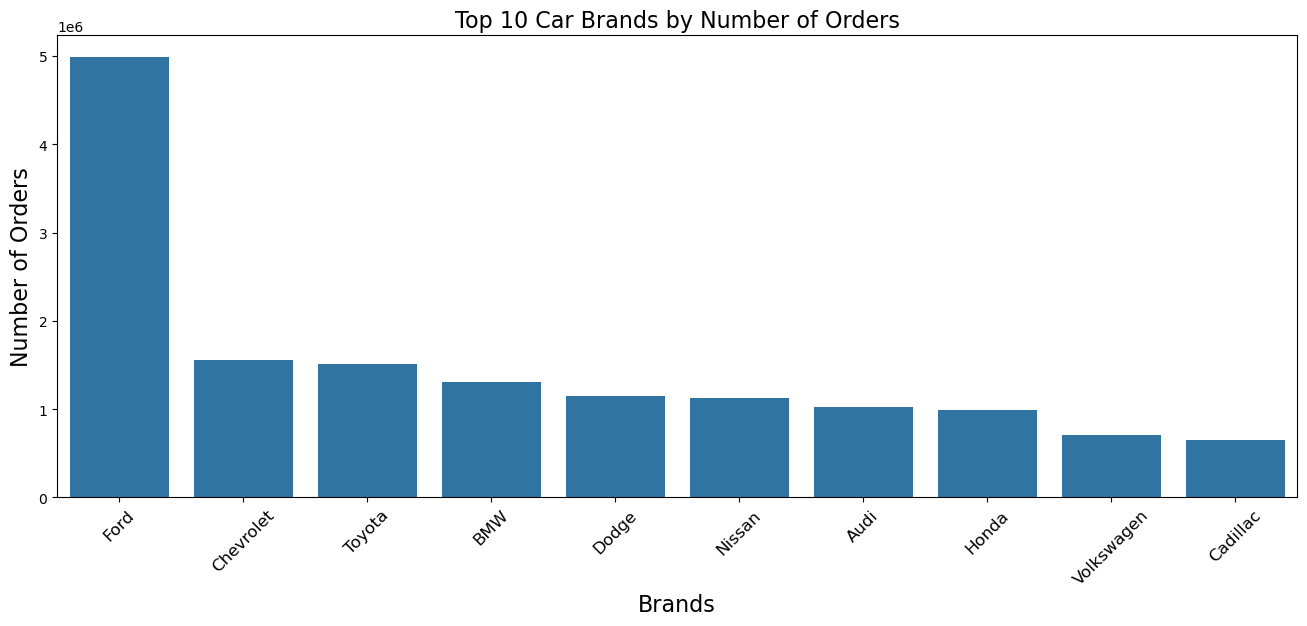

In [36]:
# top_brands.plot(kind='bar', x='Brand', y='Orders', legend=False)

# Plot the Top 10 Brands of Cars
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45, fontsize=12)

fig = sns.barplot(data = top_brands, x='Brand', y= 'Popularity')
plt.xlabel('Brands', size=16)
plt.ylabel('Number of Orders', size=16)
plt.title('Top 10 Car Brands by Number of Orders', size=16)
plt.show()

### Brand vs Price

In [37]:
# Check the top 10 Highest Price Cars
top_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).reset_index().head(10)
top_price

,Brand,Price
0,Bugatti,1.757224e+06
1,Maybach,5.462219e+05
2,Rolls-Royce,3.511306e+05
3,Lamborghini,3.315673e+05
4,Bentley,2.471693e+05
5,McLaren,2.398050e+05
6,Ferrari,2.382188e+05
7,Spyker,2.133233e+05
8,Aston Martin,1.979104e+05
9,Maserati,1.142077e+05


### Brand vs Fuel Type

In [38]:
pd.crosstab(df['Fuel_Type'],df['Brand'],normalize='columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Fuel_Type,,,,,,,,,,,,,,,,,,,,,
diesel,0.000000,0.0,0.0,8.536585,5.988024,0.000000,0.0,0.000000,0.000000,0.089206,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,8.571429,0.000000
electric,0.000000,0.0,0.0,0.000000,1.197605,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,100.0,0.268456,0.000000,0.000000
flex-fuel (premium unleaded recommended/E85),0.000000,0.0,0.0,1.524390,0.000000,0.000000,0.0,0.000000,2.267003,0.000000,...,0.0,10.810811,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (premium unleaded required/E85),0.000000,0.0,0.0,0.000000,0.000000,32.432432,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
flex-fuel (unleaded/E85),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,18.877551,11.586902,22.390723,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,8.724832,0.869565,0.000000
flex-fuel (unleaded/natural gas),0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.535236,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
natural gas,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
premium unleaded (recommended),57.936508,0.0,0.0,28.658537,8.083832,0.000000,0.0,14.795918,27.959698,7.582516,...,0.0,44.144144,0.0,0.0,5.859375,0.0,0.0,0.268456,47.080745,13.879004
premium unleaded (required),17.063492,100.0,100.0,45.426829,81.736527,67.567568,100.0,1.530612,10.579345,2.854594,...,100.0,6.306306,20.0,100.0,33.203125,0.0,0.0,1.342282,3.602484,1.779359


### Multivaiate Analysis

In [39]:
# Check top 10 Year by popularity  according to dataset
top_brands = df.groupby(['Year', 'Brand'])['Popularity'].sum().reset_index().sort_values(by='Popularity', ascending=False).head(10)
top_brands

,Year,Brand,Popularity
714,2017,Ford,922091
681,2016,Ford,899463
645,2015,Ford,780666
636,2015,BMW,403348
702,2016,Toyota,387921
673,2016,BMW,364188
732,2017,Toyota,353394
666,2015,Toyota,347301
707,2017,BMW,309364
660,2015,Nissan,307377


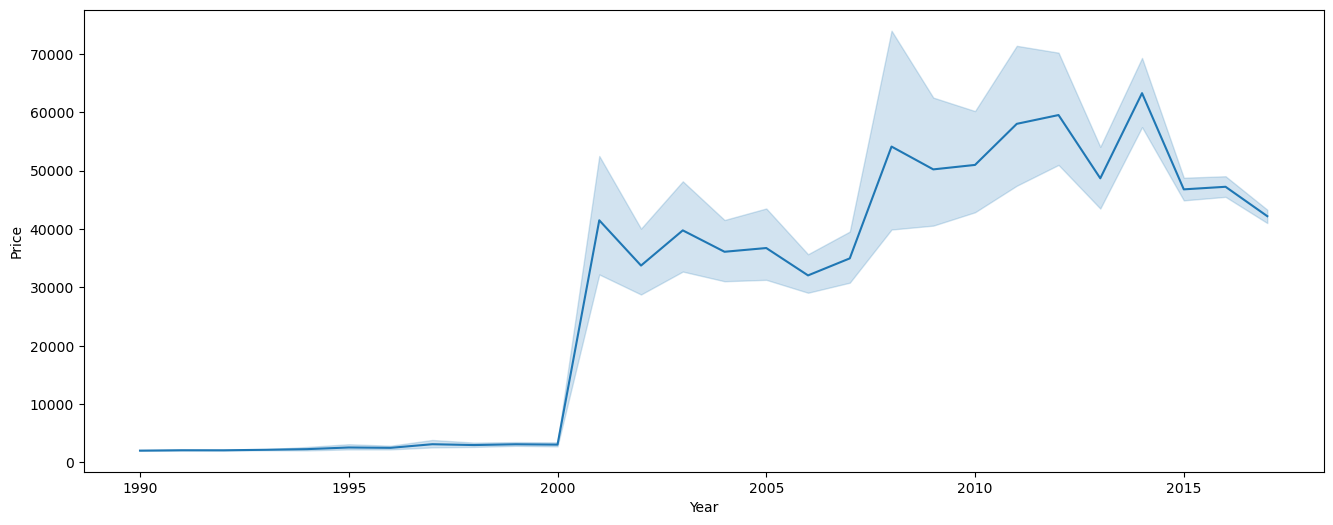

In [40]:
# Checking relationship of Year with Price

plt.figure(figsize=(16, 6))
sns.lineplot(x='Year',y='Price',data=df)
plt.show()

### Barnd Vs Price

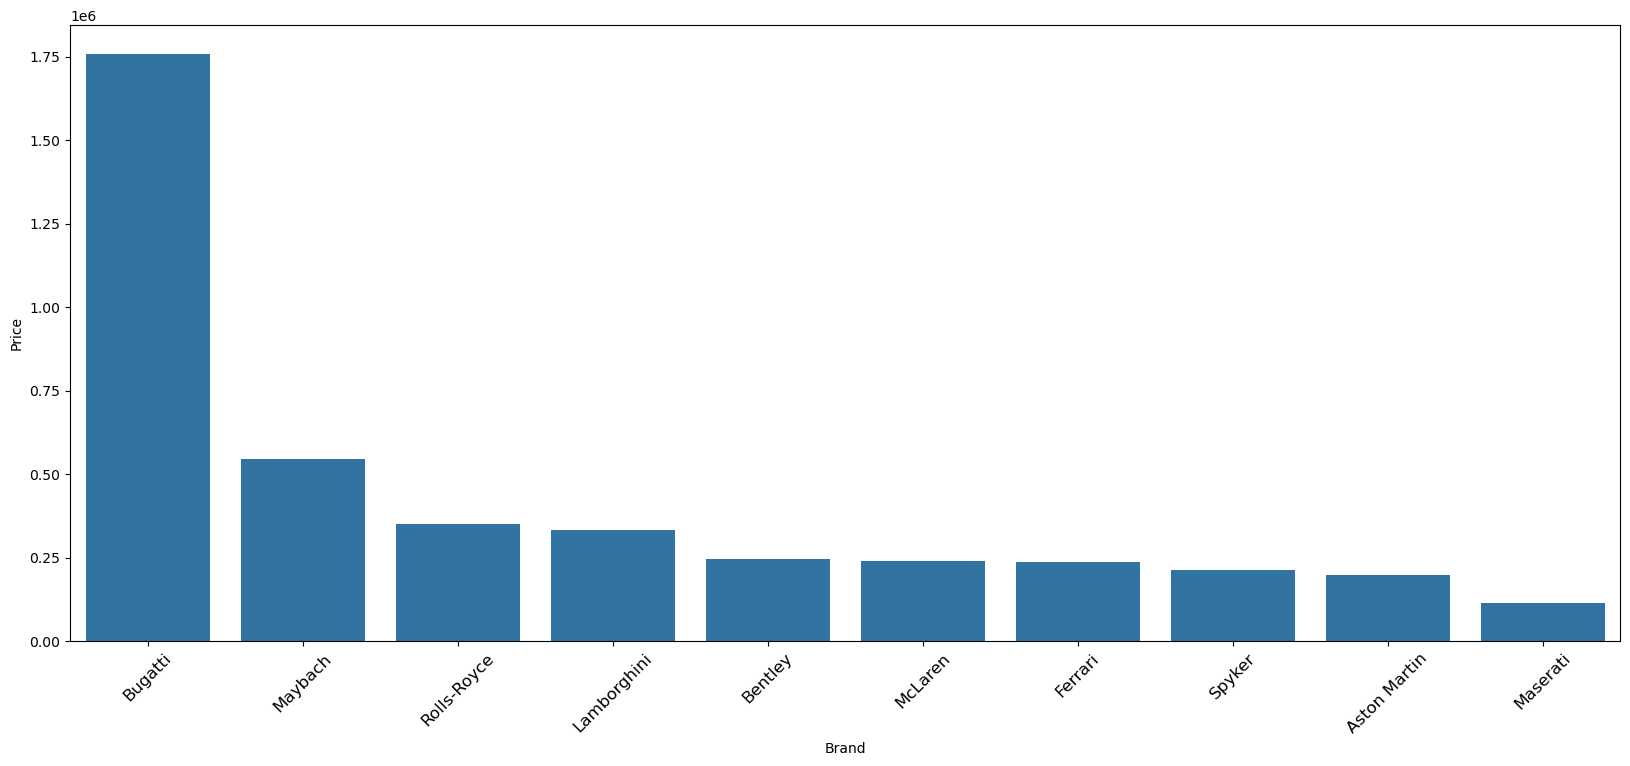

In [41]:
# Plot the top 10 cars with the highest prices
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, fontsize=12)
sns.barplot(x='Brand',y='Price',data=top_price)
plt.show()

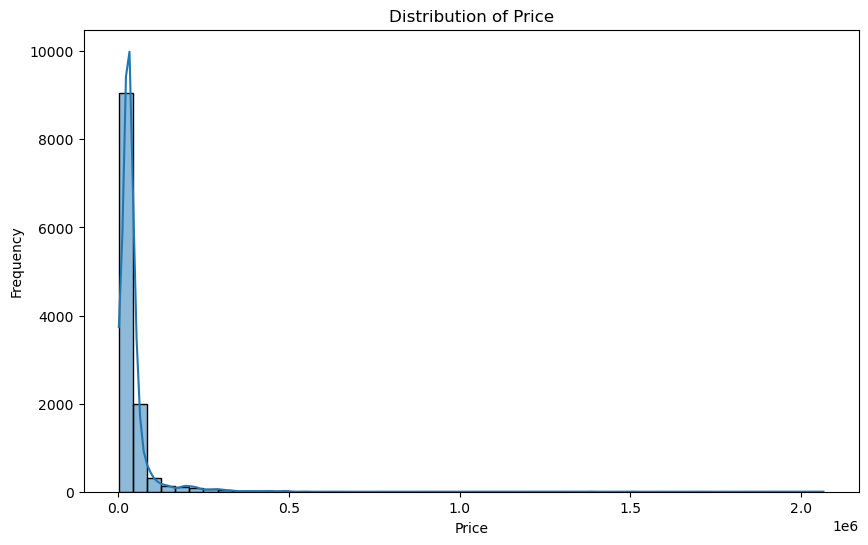

In [42]:
#Distribusi Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

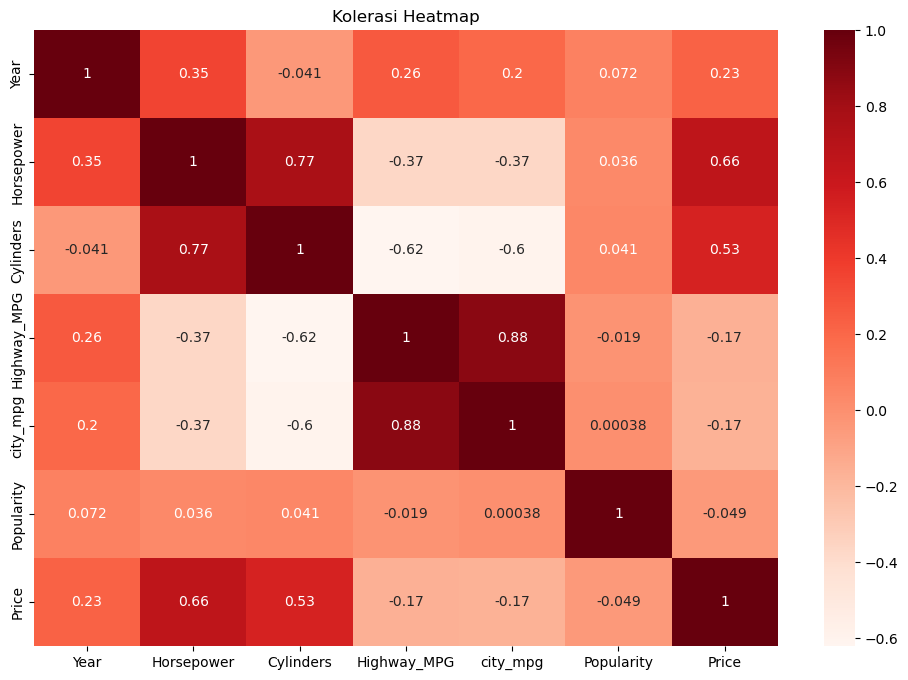

In [43]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Reds')
plt.title('Kolerasi Heatmap')
plt.show()

### Brand Vs Drive Type

In [44]:
# Create a cross-tabulation of Drive_Type vs Brand, showing percentage distribution for each brand.
pd.crosstab(df['Drive_Type'], df['Brand'], normalize = 'columns')*100

Brand,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Rolls-Royce,Saab,Scion,Spyker,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo
Drive_Type,,,,,,,,,,,,,,,,,,,,,
all wheel drive,27.380952,0.0,0.0,77.439024,43.113772,64.864865,100.0,23.979592,30.730479,4.549509,...,0.0,30.630631,0.0,0.0,86.328125,15.384615,61.111111,9.798658,8.322981,35.587189
four wheel drive,1.587302,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,9.068010,23.104371,...,0.0,0.000000,0.0,0.0,3.515625,17.378917,0.000000,25.771812,0.248447,0.000000
front wheel drive,69.444444,0.0,0.0,22.560976,0.299401,0.000000,0.0,69.387755,16.876574,34.076717,...,0.0,69.369369,80.0,0.0,5.468750,50.427350,0.000000,42.281879,90.310559,45.907473
rear wheel drive,1.587302,100.0,100.0,0.000000,56.586826,35.135135,0.0,6.632653,43.324937,38.269402,...,100.0,0.000000,20.0,100.0,4.687500,16.809117,38.888889,22.147651,1.118012,18.505338


### Pivot Table on Fuel_Type' vs 'Price

In [45]:
#Pivot table for 'Fuel_Type' vs 'Price'
df.pivot_table(values='Price', index='Fuel_Type', aggfunc='mean').sort_values(by='Price', ascending=False)


,Price
Fuel_Type,
flex-fuel (premium unleaded required/E85),159429.351852
premium unleaded (required),102240.693273
electric,50615.089286
flex-fuel (premium unleaded recommended/E85),48641.923077
premium unleaded (recommended),40812.831254
diesel,40788.000000
flex-fuel (unleaded/natural gas),39194.166667
flex-fuel (unleaded/E85),36258.260289
natural gas,28065.000000


In [46]:
# Pivot table for 'Drive_Type' vs 'Price'
pivot_drive_type_price = df.pivot_table(values='Price', index='Drive_Type', aggfunc='mean')
print(pivot_drive_type_price.sort_values(by='Price', ascending=False))

                          Price
Drive_Type                     
all wheel drive    58693.884828
rear wheel drive   55466.206897
four wheel drive   35358.955746
front wheel drive  23053.568049


In [47]:
# Pivot table for 'Vehicle_Size' vs 'Price'
df.pivot_table(values='Price', index='Vehicle_Size', aggfunc='mean').sort_values(by='Price', ascending=False)

,Price
Vehicle_Size,
Large,54040.418924
Midsize,39071.670254
Compact,34354.904842


In [48]:
# Pivot table for 'Vehicle_Style' vs 'Price'
df.pivot_table(values='Price', index='Vehicle_Style', aggfunc='mean').sort_values(by='Price', ascending=False)

,Price
Vehicle_Style,
Convertible,84422.618205
Coupe,77210.125315
4dr SUV,40418.100925
Sedan,39282.921562
Crew Cab Pickup,37220.466960
Passenger Van,29015.203125
Passenger Minivan,25621.050360
Wagon,25557.939189
Extended Cab Pickup,22488.776886


In [49]:
df.groupby(['Brand', 'Horsepower'])['Price'].mean().sort_values(ascending=False)

Brand        Horsepower
Bugatti      1001.0        1.757224e+06
Lamborghini  650.0         1.500000e+06
Maybach      620.0         7.545083e+05
Ferrari      660.0         6.433300e+05
Lamborghini  720.0         5.232250e+05
                               ...     
Oldsmobile   180.0         2.000000e+03
Ford         96.0          2.000000e+03
Oldsmobile   225.0         2.000000e+03
Ford         63.0          2.000000e+03
Pontiac      74.0          2.000000e+03
Name: Price, Length: 1154, dtype: float64

### PREDICTIVE MODELING

In [50]:
# Prepare the data for modeling
X = df[['Horsepower', 'Cylinders', 'Brand', 'city_mpg', 'Popularity']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Prepare the data for modeling
X = df[['Horsepower', 'Cylinders', 'Brand', 'city_mpg', 'Popularity']]
y = df['Price']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit the encoder on the 'Brand' column and transform it
# This is where the issue is, reset index before the join.
encoded_brands = encoder.fit_transform(X[['Brand']])

# Create a DataFrame from the encoded brands
encoded_brands_df = pd.DataFrame(encoded_brands, columns=encoder.get_feature_names_out(['Brand']))

# Now align the index with the original X DataFrame
encoded_brands_df.index = X.index

# Drop the original 'Brand' column and concatenate the encoded brands
X = X.drop('Brand', axis=1)
X = pd.concat([X, encoded_brands_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Now the model should train without errors

LinearRegression()

In [52]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(778535300.8595843, 0.7744940317001887)

In [53]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(778535300.8595843, 0.7744940317001887)

In [54]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

                Feature   Coefficient
10        Brand_Bugatti  1.499247e+06
32        Brand_Maybach  3.153976e+05
42    Brand_Rolls-Royce  1.988263e+05
26    Brand_Lamborghini  1.688527e+05
17        Brand_Ferrari  1.114288e+05
20        Brand_Genesis -9.261370e+04
38     Brand_Oldsmobile -9.241736e+04
24       Brand_Infiniti -8.672265e+04
39       Brand_Plymouth -8.530584e+04
40        Brand_Pontiac -8.453121e+04
11          Brand_Buick -8.286953e+04
9         Brand_Bentley  8.217822e+04
21         Brand_HUMMER -8.156489e+04
29        Brand_Lincoln -8.139588e+04
4           Brand_Acura -8.123702e+04
19            Brand_GMC -8.123495e+04
44          Brand_Scion -8.108462e+04
43           Brand_Saab -8.064741e+04
36     Brand_Mitsubishi -7.731243e+04
47         Brand_Suzuki -7.657987e+04
46         Brand_Subaru -7.580904e+04
33          Brand_Mazda -7.545739e+04
51          Brand_Volvo -7.469135e+04
14       Brand_Chrysler -7.262263e+04
28          Brand_Lexus -7.231979e+04
13      Bran

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation scores: {scores}")
print(f"Mean R-squared: {scores.mean()}")

Cross-validation scores: [-0.71913093  0.83402716  0.37097685  0.66010635  0.33428806]
Mean R-squared: 0.29605349701122047


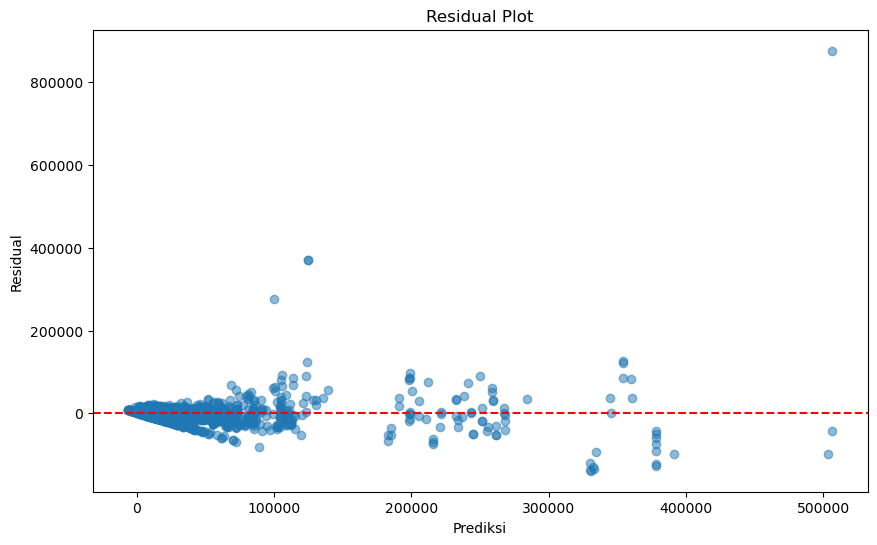

In [56]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

# <p style="background-color:#0089bf; font-family:'Dancing Script', cursive; color:#FFFFFF; font-size:120%; text-align:center; border: 3px solid #FFEB3B; border-radius:40px; padding: 10px;">Summary of EDA</p>

pada dataset yang saya miliki yaitu mengenai Car features and MSRP EDA. Pada dataset ini terdapat 11.914 baris dengan memiliki 15 fitur. 15 fitur pada dataset ini yaitu Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP. datatype pada dataset ini terdapat 3 fitur yang float, 5 fitur yang integer, dan 8 fitur yang objects.